# In notebook not only Simple Linear Regression, You will also learn Cost function, Optimization of cost function, Performance metrics 

# Simple Linear Regression

In [ ]:
Machine learning  (ML)

1. Supervised machine learning -  Data is trained on label data
    a. Regression
    b. Classification
2. Unsupervised machine learning - Data is trained on unlabeled data
    a. Clustering
    b. Dimensionality reduction
3. Reinforcement machine learning

In [ ]:
a. Regression - Output is Continuous
b. Classification - Output is binary or multi class categories

In [ ]:
Regression : 
1. Simple Linear regression
2. Multi linear regression
3. Logistic regression
4. Polynomial regression

Regularization techniques : L1 (Lasso) , L2 (Ridge)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Read the dataset
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.shape

(23, 2)

Text(0, 0.5, 'Height')

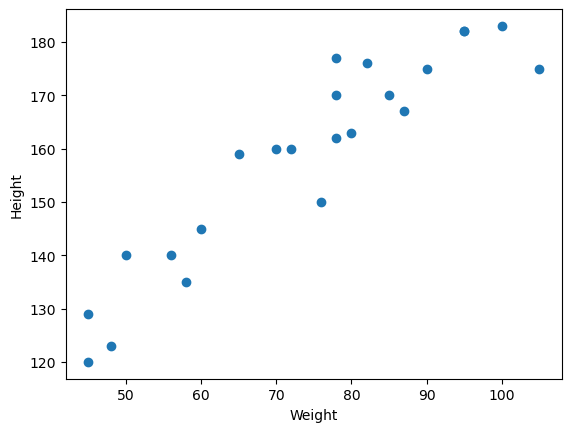

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
## divide our dataset into independent and dependent features

x=df[['Weight']]  ## Independent features

In [8]:
y=df[["Height"]]   ## Dependent features

In [9]:
x.shape

(23, 1)

In [10]:
## Train test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [13]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((18, 1), (5, 1), (5, 1), (18, 1))

In [14]:
## Standardize the dataset Train independent data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
x_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [18]:
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
# scaled data on which ML Model will be trained
x_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

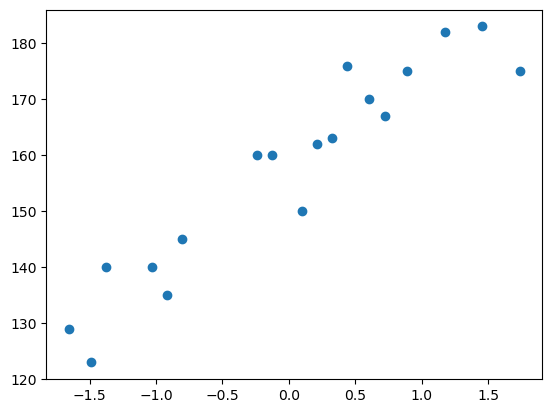

In [20]:
plt.scatter(x_train,y_train)

In [21]:
## Train the Simple Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regression=LinearRegression()

In [24]:
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
print("The slope or coefficient of weight is ",regression.coef_)
print("Intercept:",regression.intercept_)

The slope or coefficient of weight is  [[17.03440872]]
Intercept: [157.5]


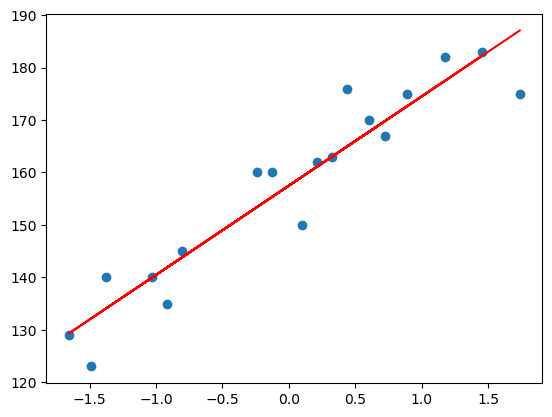

In [26]:
#  BEST FIT LINE - ON TRAIN DATA ( IT IS GIVING BEST FIT LINE Because it is trained on the SAME data If we test on new data then We will know our model is performing well or not)
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),'r')

In [ ]:
# General equation of line
y = mx + c 
Where:
m is the slope.
c is the y-intercept.
x is the input feature (height).
y is the predicted output (weight).

# In machine learning
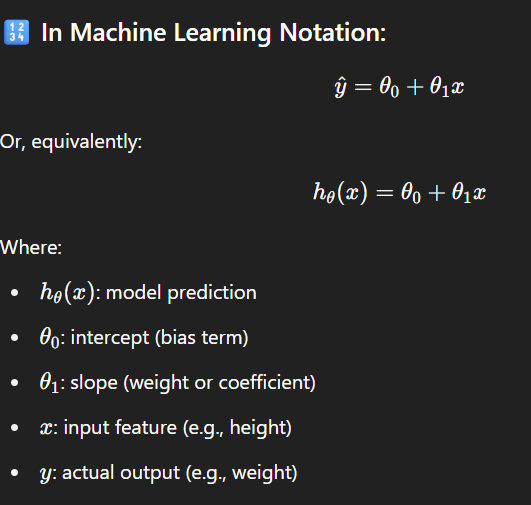

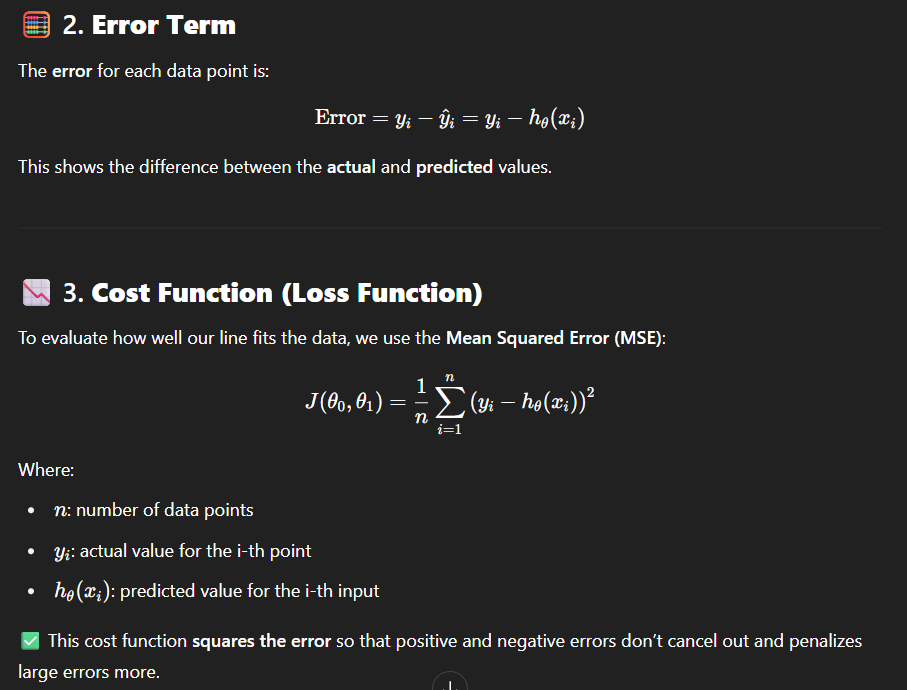

| Concept                 | Meaning                                                               |
| ----------------------- | --------------------------------------------------------------------- |
| $\theta_0, \theta_1$    | Parameters (intercept, slope)                                         |
| $J(\theta_0, \theta_1)$ | Cost function (how wrong our model is)                                |
| Minimize Cost           | Find the best values of $\theta_0$, $\theta_1$                        |
| Gradient Descent        | Algorithm to minimize cost by adjusting $\theta$ values step-by-step  |
| Maximize?               | ❌ Not the goal. We optimize (which could increase or decrease values) |


In [ ]:
Complete Model - Backend Maths

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [27]:
regression.intercept_

array([157.5])

In [28]:
regression.coef_

array([[17.03440872]])

In [29]:
x_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [30]:
ty = regression.predict(x_train)

In [31]:
ty

array([[187.0869102 ],
       [141.82375282],
       [182.27168069],
       [161.08467086],
       [132.19329381],
       [177.45645118],
       [129.3041561 ],
       [143.74984463],
       [153.38030364],
       [159.15857905],
       [134.11938561],
       [139.89766102],
       [155.30639545],
       [172.64122168],
       [164.93685446],
       [167.82599217],
       [169.75208397],
       [163.01076266]])

In [32]:
y_pred_test = regression.predict(x_test)

In [33]:
y_pred_test

array([[163.44962265],
       [163.44962265],
       [129.59832137],
       [180.88817179],
       [150.11426154]])

In [34]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


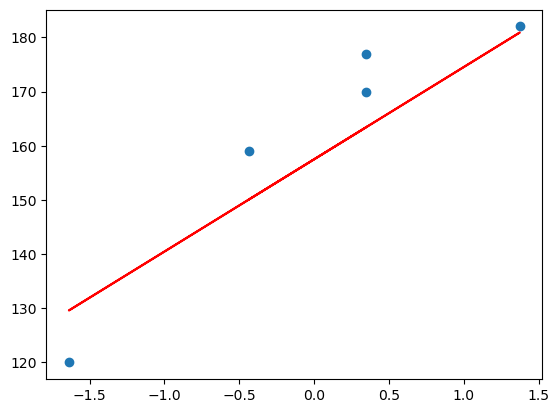

In [35]:
# Fit line for testing data - Model is unknown of these data so it predicted the Values
plt.scatter(x_test,y_test)
plt.plot(x_test,regression.predict(x_test),'r')

# Cost Function :
In machine learning, a cost function (or loss function) quantifies the difference between a model's predictions and actual values, serving as a metric to evaluate model performance and guide optimization. By minimizing the cost function, models learn to make better predictions, improving their accuracy and generalization capabilities

 # Single Short Understanding of Cost Function
 The cost (or loss) function evaluates how well the model is performing. The optimization technique is what adjusts the model parameters to minimize that loss, i.e., train the model. 
\]


| Category                  | Cost/Loss Function             | Optimizer            |
| ------------------------- | ------------------------- | -------------------- |
| Regression                | MSE, MAE, Huber           | SGD, Adam            |
| Binary Classification     | Binary Cross-Entropy      | SGD, RMSprop, Adam   |
| Multiclass Classification | Categorical Cross-Entropy | Adam, Adagrad        |
| Deep Learning             | Any of above              | Adam, Nadam, RMSprop |
| Probabilistic Models      | KL Divergence             | SGD, Adam            |


## Performance Metrics
 - ### MSE,MAE,RMSE
 - ### R square and adjusted R square

#### MSE (Mean Squared Error)
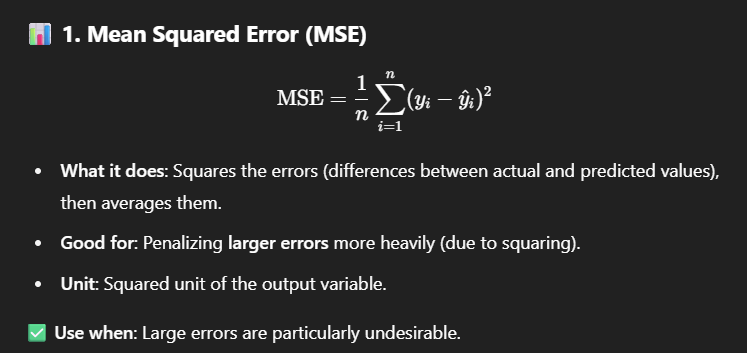
#### MAE (Mean Absolute Error)
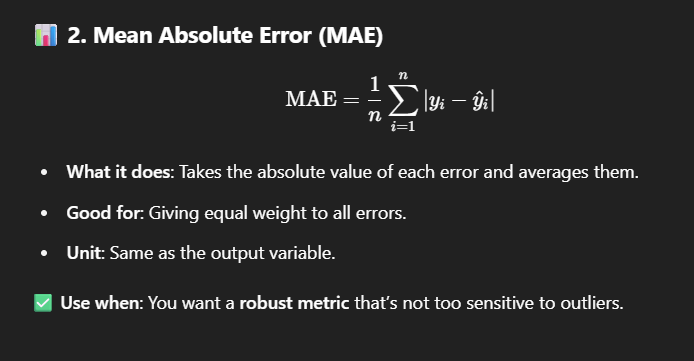
#### RMSE (Root Mean Squared Error)
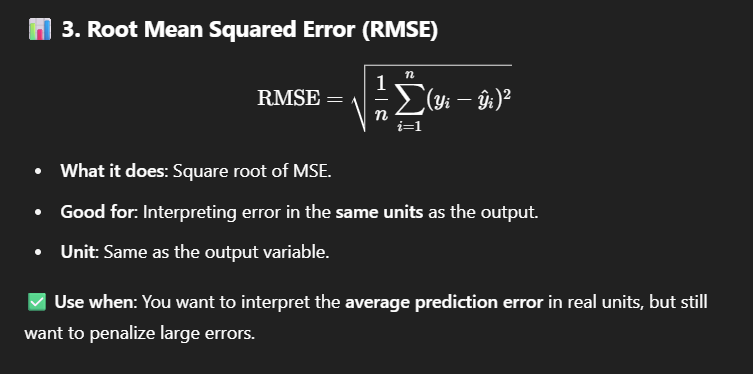

| Metric | Penalizes Outliers | Easy to Interpret | Unit of Output | Use Case                          |
| ------ | ------------------ | ----------------- | -------------- | --------------------------------- |
| MSE    | ✅ High             | ❌                 | Squared Units  | Optimization, Training            |
| MAE    | ❌ Low              | ✅                 | Same Units     | Robust error analysis             |
| RMSE   | ✅ Moderate         | ✅                 | Same Units     | Reporting, Performance comparison |


In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
# This is the error still the model should learn to get the best 100 percent Accuracy

79.76809057832979
7.9393285483063725
8.931298370244372


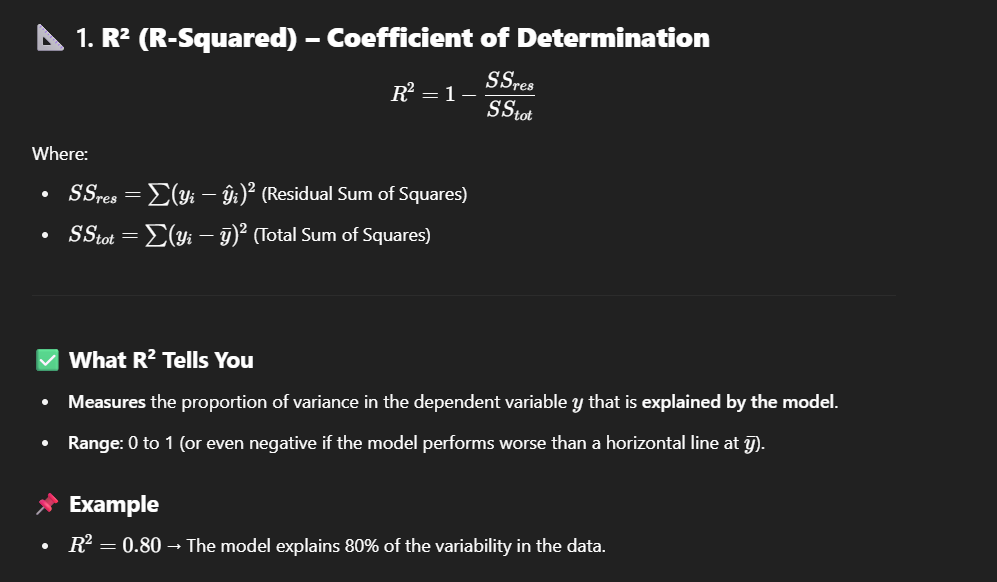

## R square
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

In [40]:
# This is the R Square score it is performing 83% good
score

0.8379487839705635

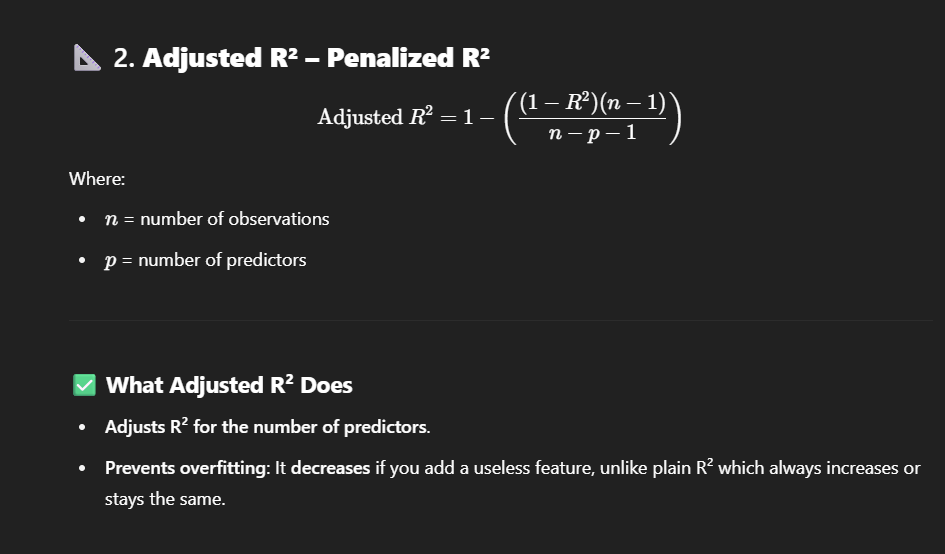

## Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [41]:
#display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7839317119607513

In [ ]:
# Remember R Square will be greater than adjusted R Square

In [42]:
regression

LinearRegression()

In [43]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.46970909]])

In [44]:
scaled_weight[0]

array([0.46970909])

In [45]:
print("The height prediction for weight 80 kg is :",regression.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [[165.50121667]]


### Assumptions - When should I think that my model is performing well and Do I created a good model
### 1. If your model is performing best on Test data where the data points are linearly represented then you can assume that your model is performing well and you created a good model - plot a scatter plot for the prediction
### 2. Plot an Residual Scatter plot with respect to Predicted data and If data in Scatterplot is uniform distribution. Then you can assume that your model is performing well    
### 3. Plot distplot graph on residuals- If the curve is in normal distribution then you can assume that your model is performing well


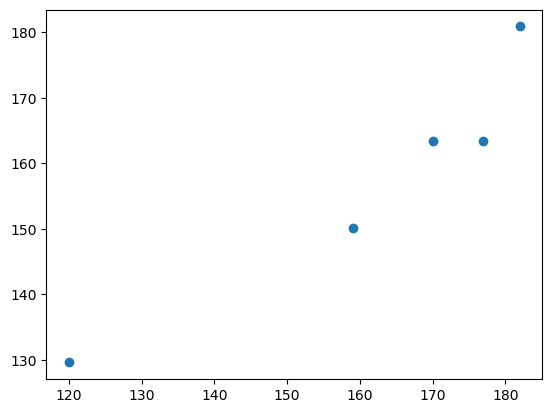

In [46]:
plt.scatter(y_test,y_pred_test)

- "Error" refers to the difference between a predicted value and the actual value,
- while "residual" specifically refers to the difference between an observed value and the value predicted by a model

In [47]:
## Residuals
residuals=y_test-y_pred_test
residuals

,Height
15,13.550377
9,6.550377
0,-9.598321
8,1.111828
17,8.885738


C:\Users\vishn\AppData\Local\Temp\ipykernel_14768\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

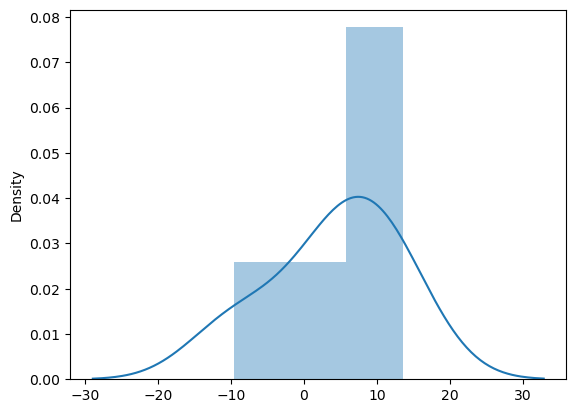

In [48]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

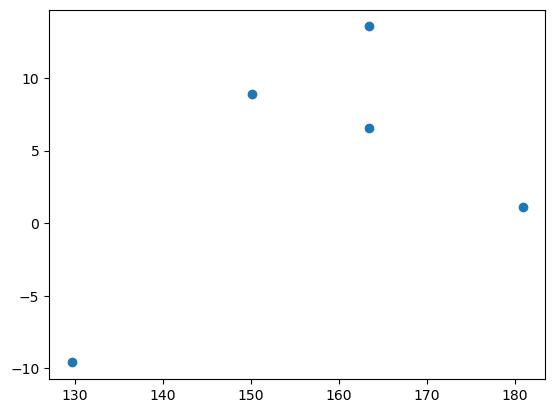

In [49]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

# 📊 Model Evaluation Metrics Table
| **Metric**                         | **Ideal Value/Range**               | **Why We Use It**                                 | **Good Sign**                   | **Bad Sign**                                     |
| ---------------------------------- | ----------------------------------- | ------------------------------------------------- | ------------------------------- | ------------------------------------------------ |
| **MAE** (Mean Absolute Error)      | Low (e.g., <10 if target is 0–100)  | Measures average error (no squares)               | Small average error             | Large MAE vs. target range                       |
| **MSE** (Mean Squared Error)       | Very low (depends on squared scale) | Penalizes large errors more (squares the errors)  | Low value                       | Very high → outliers or poor predictions         |
| **RMSE** (Root Mean Squared Error) | Slightly more than MAE; still low   | Same as MSE, but in original units (easy to read) | Close to MAE, low overall       | Much higher than MAE → large errors present      |
| **R²** (R-squared)                 | 0.75 – 1.0                          | Shows how much variance is explained              | Closer to 1 → model fits well   | < 0.6 → weak model                               |
| **Adjusted R²**                    | Close to R²                         | Corrects R² for extra/irrelevant features         | Close to R² (difference < 0.05) | Much lower than R² → overfitting or bad features |
   |


# ✅ Quick Meaning of Each Metric

| **Metric**      | **Meaning**                                                                                    |
| --------------- | ---------------------------------------------------------------------------------------------- |
| **MAE**         | On average, how much your predictions are off. Simple and easy to understand.                  |
| **MSE**         | Like MAE, but **penalizes large errors** more by squaring them. Used to catch bad predictions. |
| **RMSE**        | Just square root of MSE. Keeps units same as original, easier to interpret than MSE.           |
| **R²**          | What **% of variation** in your data the model is able to explain.                             |
| **Adjusted R²** | Same as R² but punishes for adding **useless features**. Helps avoid overfitting.              |
